In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
X = np.array([1, 2, 3, 4, 5])  #Study hours
y = np.array([1, 3, 2, 3, 5])   #Exam Score

X = X.reshape(-1, 1)

print("X shape:", X.shape)
print("X:", X)
print("Y:", y)

X shape: (5, 1)
X: [[1]
 [2]
 [3]
 [4]
 [5]]
Y: [1 3 2 3 5]


In [ ]:
X_b = np.c_[np.ones((X.shape[0], 1)), X]
print("X with bias terms", X_b)

X with bias terms [[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]


In [ ]:
# Normal Equation: theta = (X^T * X)^(-1) * X^T * y
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Best theta (parameters):", theta_best)


Best theta (parameters): [0.4 0.8]


In [ ]:
# Let's predict for two new points: 0 and 6
X_new = np.array([[1], [6]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

# Predictions
y_predict = X_new_b.dot(theta_best)
print("Predictions:", y_predict)


Predictions: [1.2 5.2]


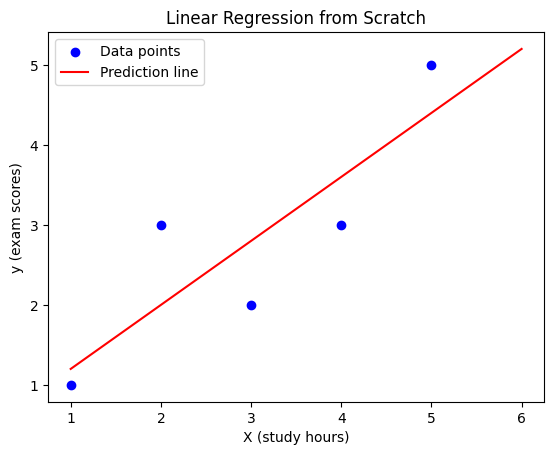

In [ ]:
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X_new, y_predict, "r-", label="Prediction line")
plt.xlabel("X (study hours)")
plt.ylabel("y (exam scores)")
plt.legend()
plt.title("Linear Regression from Scratch")
plt.show()


###USING GRADIENT DESCENT

In [13]:
import numpy as np
import matplotlib.pyplot as plt


In [19]:
# Input (X) and Output (y)
X = np.array([1, 2, 3, 4, 5])  #Study hours
y = np.array([1, 3, 2, 3, 5])   #Exam Score

# Reshape X into column vector
X = X.reshape(-1, 1)


In [21]:
# Add bias term (column of ones)
X_b = np.c_[np.ones((X.shape[0], 1)), X]


In [25]:
# Learning rate (step size) and number of iterations
alpha = 0.01
n_iterations = 1000


# Number of samples
m = len(y)

# Initialize theta randomly (2 values: intercept + slope)
theta = np.random.randn(2, 1)

# Reshape y for matrix operations
y = y.reshape(-1, 1)

# Gradient Descent loop
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha * gradients

print("Theta found by Gradient Descent:", theta)


Theta found by Gradient Descent: [[0.39158012]
 [0.80233217]]


In [26]:
# Predict for new data
X_new = np.array([[0], [6]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta)

print("Predictions:", y_predict)


Predictions: [[0.39158012]
 [5.20557315]]


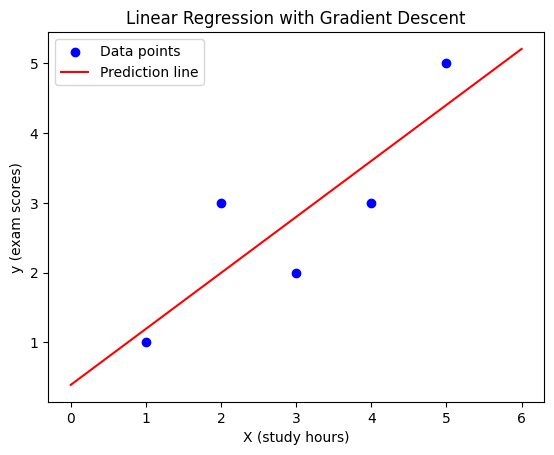

In [27]:
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X_new, y_predict, "r-", label="Prediction line")
plt.xlabel("X (study hours)")
plt.ylabel("y (exam scores)")
plt.legend()
plt.title("Linear Regression with Gradient Descent")
plt.show()


In [28]:
cost_history = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha * gradients

    # Compute cost (MSE)
    cost = np.mean((X_b.dot(theta) - y) ** 2)
    cost_history.append(cost)


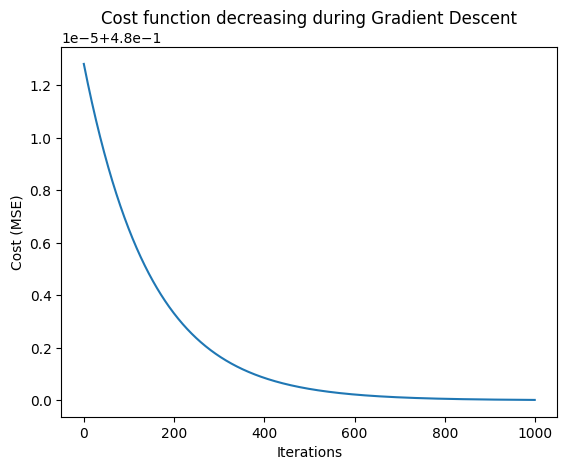

In [29]:
plt.plot(range(n_iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Cost function decreasing during Gradient Descent")
plt.show()
